> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
- Data Cleaning
<li><a href="#eda">Exploratory Data Analysis</a></li>
- Exploratory Data Overview:  <br />
- Research Question 1: <br />
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? <br />
- Research Question 2:
Which day are the most appointment made? How was the attendance rate for each day?
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [93]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [94]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [95]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [96]:
df.shape

(110527, 14)

In [97]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning:
Drop non-important column, rename column name & replace no_show data.  <br />
By the way, there is no missing value as df.info() shown all columns total rows are equal to 110527.

In [99]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [100]:
# Drop those columns that are not important for the analysis
df.drop(['PatientId', 'AppointmentID', ], axis=1, inplace=True)

In [101]:
# Rename the column name
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [102]:
# To make sure the no_show column consists only 'Yes' and 'No'
df['no_show'].unique()

array(['No', 'Yes'], dtype=object)

In [103]:
# Replace No for Present and Yes for Absent as the dataset stated for better understanding
df['no_show'].replace({'No':'Present', 'Yes':'Absent'}, inplace=True)

In [104]:
# Checking the range of age
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1], dtype=int64)

In [105]:
# Drop the age rows that less than 0 and greater than 99
df.drop(df[(df.age < 0) | (df.age > 99)].index, inplace=True)

In [106]:
df['age'].unique()

array([62, 56,  8, 76, 23, 39, 21, 19, 30, 29, 22, 28, 54, 15, 50, 40, 46,
        4, 13, 65, 45, 51, 32, 12, 61, 38, 79, 18, 63, 64, 85, 59, 55, 71,
       49, 78, 31, 58, 27,  6,  2, 11,  7,  0,  3,  1, 69, 68, 60, 67, 36,
       10, 35, 20, 26, 34, 33, 16, 42,  5, 47, 17, 41, 44, 37, 24, 66, 77,
       81, 70, 53, 75, 73, 52, 74, 43, 89, 57, 14,  9, 48, 83, 72, 25, 80,
       87, 88, 84, 82, 90, 94, 86, 91, 98, 92, 96, 93, 95, 97, 99], dtype=int64)

### Note: 
I maintain the dataset with the age range from 0 to 100.

In [107]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Present
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Present
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Present
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Present


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



###  Exploratory Data Overview:
1. Explore the no_show data with pie chart and bar chart <br />
2. Plot histogram for all variables against no_show <br />
3. Plot scatter for each of variable against no_show <br />
4. Plot pie chart for each of variable against no_show

In [109]:
# Check the total amount of present
present = (df.no_show == 'Present').sum()
present

88199

In [110]:
# Check the total amount of absent
absent = (df.no_show == 'Absent').sum()
absent

22316

In [111]:
# Percentage of absent and present
(absent/(present + absent)*100, present/(present + absent)*100)

(20.192734018006604, 79.807265981993396)

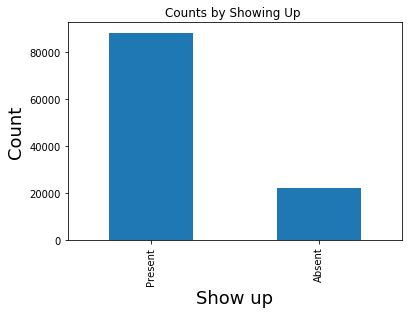

In [112]:
# Plot the bar chart for the present and absent
df['no_show'].value_counts().plot(kind='bar', title = 'Counts by Showing Up ')
plt.xlabel('Show up', fontsize=18)
plt.ylabel('Count', fontsize=18);

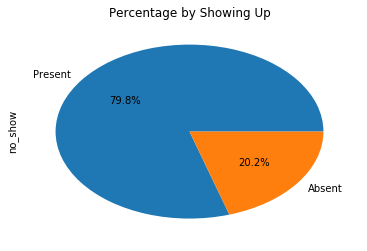

In [113]:
# Plot the pie chart for the present and absent
df['no_show'].value_counts().plot(kind='pie', title = 'Percentage by Showing Up', autopct='%1.1f%%');

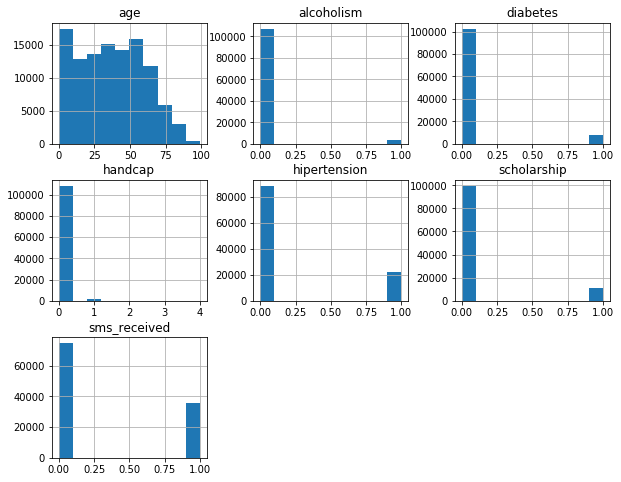

In [114]:
# Explore the data distribution for each variable
df.hist(figsize =(10, 8));

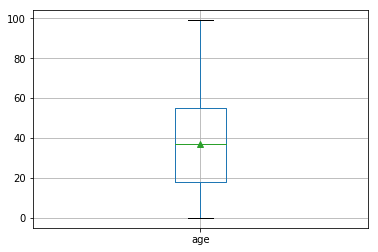

In [115]:
# boxplot for age
df.boxplot(['age'], showmeans=True);

### Note for age boxplot:
mean: 37 <br />
25%: 18 <br />
75%: 55

### Note:
First I planned to make scatter plot below for each of the variable with no_show. <br />
Due to no_show is categorical data so I cannot plot in scatter so I decided to use categorical plot

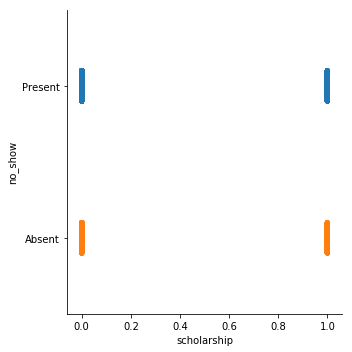

In [116]:
# Categorical plot for variable 'scholarship' with no_show
sns.catplot(x="scholarship", y="no_show", order=["Present", "Absent"], data=df);

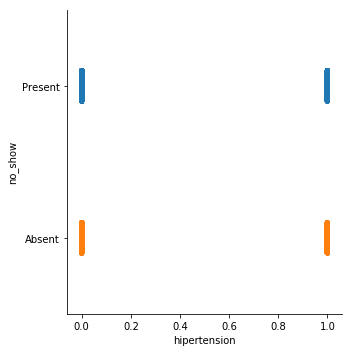

In [117]:
# Categorical plot for variable 'scholarship' with no_show
sns.catplot(x="hipertension", y="no_show", order=["Present", "Absent"], data=df);

### Note:
After I made some categorical plots, I found out that it not useful in exploring the dataset. <br /> Then I proceed to scatter plot with each of the variables with no_show.

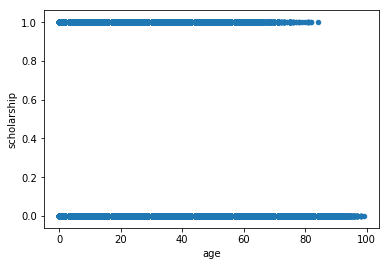

In [118]:
# Scatter plot for variable 'scholarship' with age
df.plot.scatter(x='age', y='scholarship');

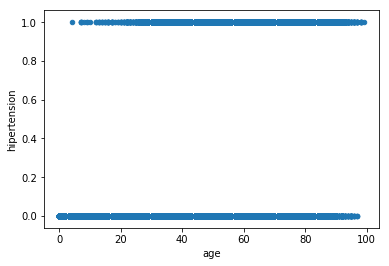

In [119]:
# Scatter plot for variable 'hipertension' with age
df.plot.scatter(x='age', y='hipertension');

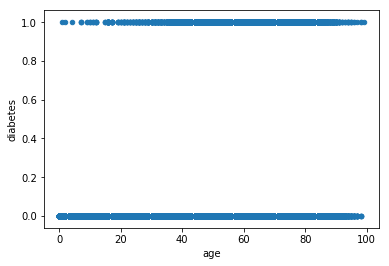

In [120]:
# Scatter plot for variable 'diabetes' with age
df.plot.scatter(x='age', y='diabetes');

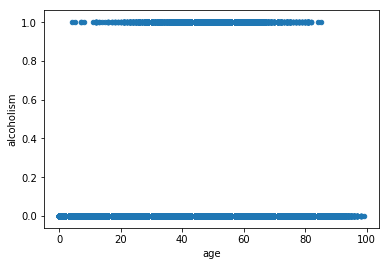

In [121]:
# Scatter plot for variable 'alcoholism' with age
df.plot.scatter(x='age', y='alcoholism');

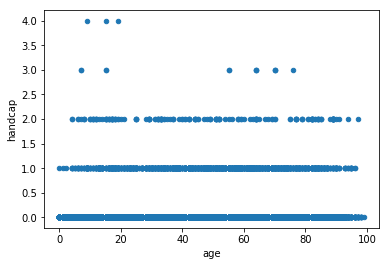

In [122]:
# Scatter plot for variable 'handcap' with age
df.plot.scatter(x='age', y='handcap');

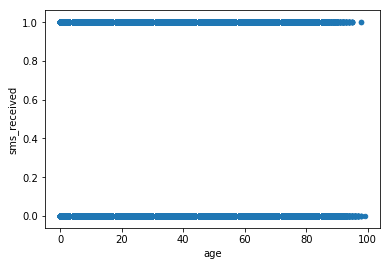

In [123]:
# Scatter plot for variable 'sms_received' with age
df.plot.scatter(x='age', y='sms_received');

### Note:
As scatter plot above shown it did show the saturation for each of variable with the range of age.

### Research Question 1: 
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? <br />
Idea: I using groupby function to select each of the variables with the no_show result, then compare each of groupby data with and bar chart and pie chart.

In [124]:
# Function for bar plot
def plot_bar(variable):
    df.groupby([variable, 'no_show']).count()['age'].plot(kind='bar', title = 'Counts by '+variable+ ' Showing Up')
    plt.xlabel(variable, fontsize=18)
    plt.ylabel('Count', fontsize=18);

In [125]:
# Function for pie plot
def plot_pie(variable):
    df.groupby([variable, 'no_show']).count()['age'].plot(kind='pie', title = 'Percentage by '+variable+ ' Showing Up', autopct='%1.1f%%')
    plt.ylabel('');

### Gender

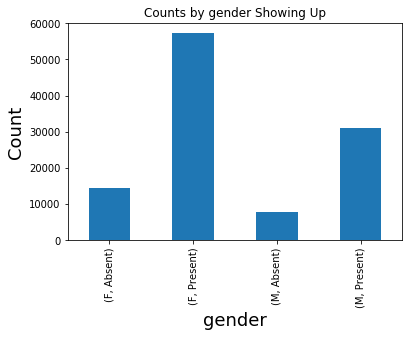

In [126]:
# Bar chart for variable 'gender' with no_show
plot_bar('gender')

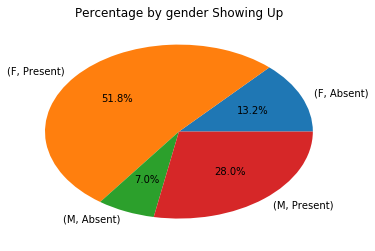

In [127]:
# Pie chart for variable 'gender' with no_show
plot_pie('gender')

### Scholarship

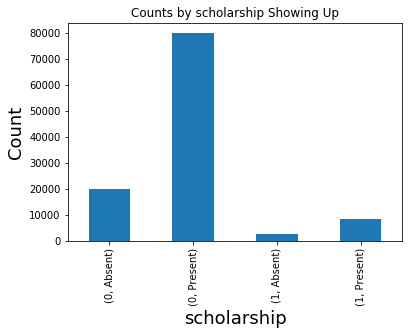

In [128]:
# Bar chart for variable 'scholarship' with no_show
plot_bar('scholarship')

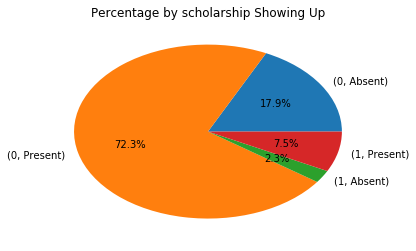

In [129]:
# Pie chart for variable 'scholarship' with no_show
plot_pie('scholarship')

### Hipertension

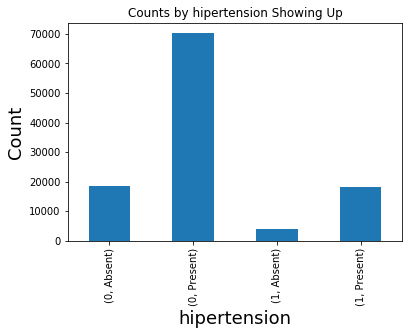

In [130]:
# Bar chart for variable 'hipertension' with no_show
plot_bar('hipertension')

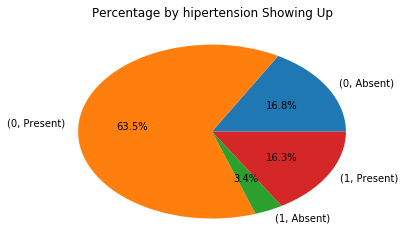

In [131]:
# Pie chart for variable 'hipertension' with no_show
plot_pie('hipertension')

### Diabetes

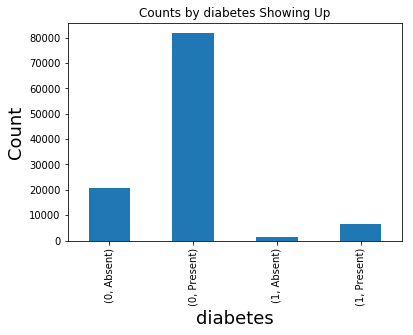

In [132]:
# Bar chart for variable 'diabetes' with no_show
plot_bar('diabetes')

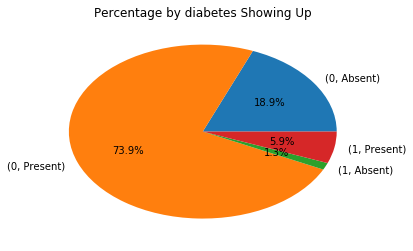

In [133]:
# Pie chart for variable 'diabetes' with no_show
plot_pie('diabetes')

### Alcoholism

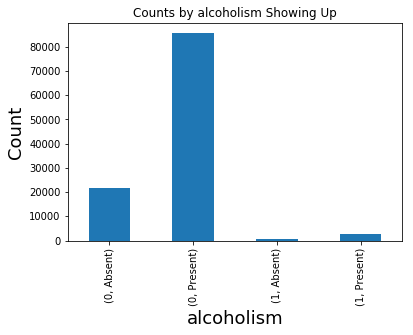

In [134]:
# Bar chart for variable 'alcoholism' with no_show
plot_bar('alcoholism')

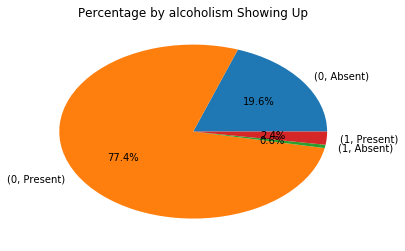

In [135]:
# Pie chart for variable 'alcoholism' with no_show
plot_pie('alcoholism')

### Handcap

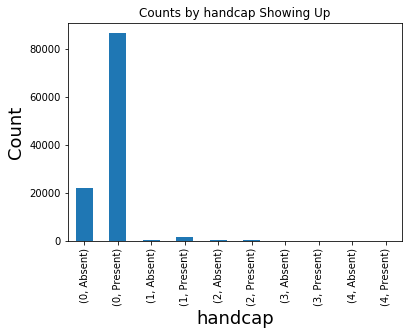

In [136]:
# Bar chart for variable 'handcap' with no_show
plot_bar('handcap')

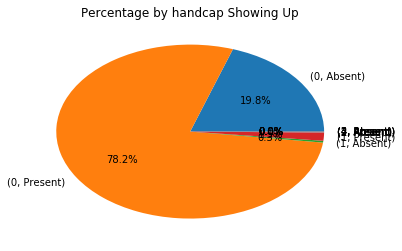

In [137]:
# Pie chart for variable 'handcap' with no_show
plot_pie('handcap')

### Note:
Zero handcap did show the highest attendance rate with 78.2%

### SMS Received

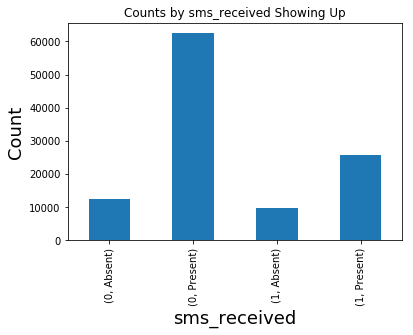

In [138]:
# Bar chart for variable 'sms_received' with no_show
plot_bar('sms_received')

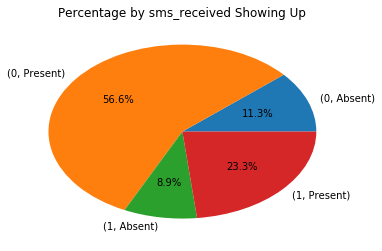

In [139]:
# Pie chart for variable 'sms_received' with no_show
plot_pie('sms_received')

### Result:
For the variable that give highest attendance rate are variable with zero handcap consists of 78.2%. <br />
Follow by alcoholism variable with 77.4% attendance rate that are not alcoholism. <br />
This two are the significant factors to predict if a patient will show up for their scheduled appointment.

### Research Question 2:
Which day are the most appointment made? How was the attendance rate for each day?

In [140]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

In [141]:
# Change the appointmentday data type from object to datetime
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [142]:
# Create new column name 'weekday' from 0 to 6 where 0 is Monday 6 is Sunday
df['weekday']=df['appointmentday'].dt.dayofweek

### Note: 
0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday, 5 = Saturday, 6 = Sunday

In [143]:
df['weekday'].nunique()

6

In [144]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,weekday
0,F,2016-04-29T18:38:08Z,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Present,4
1,M,2016-04-29T16:08:27Z,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Present,4
2,F,2016-04-29T16:19:04Z,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Present,4
3,F,2016-04-29T17:29:31Z,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present,4
4,F,2016-04-29T16:07:23Z,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Present,4


In [145]:
# Observe the total count of appointment made by day
df_day = df.groupby(['weekday']).count()['age']
df_day

weekday
0    22712
1    25637
2    25866
3    17244
4    19017
5       39
Name: age, dtype: int64

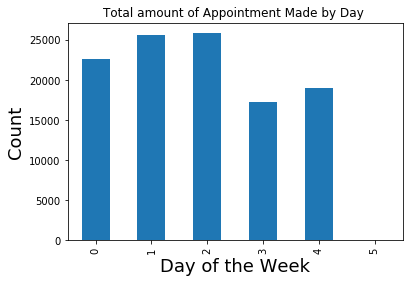

In [146]:
# Observe the total amount of appointment made by day in bar chart
df_day.plot(kind='bar', title = 'Total amount of Appointment Made by Day ')
plt.xlabel('Day of the Week', fontsize=18)
plt.ylabel('Count', fontsize=18);

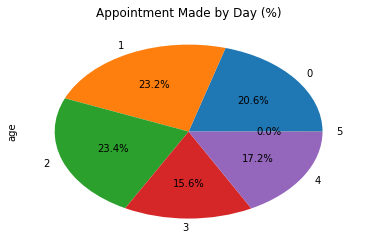

In [147]:
# Observe the total amount of appointment made by day in pie chart
df_day.plot(kind='pie', title = 'Appointment Made by Day (%)', autopct='%1.1f%%');

### Result:
Wednesday was the day with highest total amount of appointment made which is 25867 (23%). Then followed by Tuesday with 25640 (23.2%). The lowest total amount of appointment made is Saturday with 39 and no record found in Sunday probably an off day. <p>


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### Conclusions
For the first research question handcap and alcoholism are the significant factors to predict if a patient will show up for their scheduled appointment. Second research question Wednesday was the most popular day for people to attend their appointment.
In the exploratory data section, I think scatter plot not suitable for categorical data, so most of the time I had to use bar chart and pie chart to describe the data.